<a href="https://colab.research.google.com/github/PeiLi-Sandman/machine_learning/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Problem 1

In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# if digit == 1, then label = 1, else label = 0
func = lambda x: 1 if x == 1 else 0

In [0]:
x_train = x_train_origin.reshape((60000, 28 * 28))
x_test = x_test_origin.reshape((10000, 28 * 28))

In [0]:
y_train = np.array([func(y) for y in y_train_origin])
y_test = np.array([func(y) for y in y_test_origin])

In [0]:
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T

y_train = y_train.reshape(1,y_train.shape[0])
y_test = y_test.reshape(1,y_test.shape[0])

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [0]:
def sigmoid(z):
    
    s = 1.0/(1.0 + np.exp(-z))
    
    return s

In [0]:
def initialize_params_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [0]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    # MSE Loss Function
    loss = (1/m) * np.sum(np.square(Y - A))
    
    dL = 2*(A - Y)
    dA = A * (1 - A) * dL
    
    # Derivative of w and d
    dw = (1/m) * np.dot(X, dA.T)
    db = (1/m) * np.sum(dA)

    grads = {"dw": dw,
             "db": db}
    return grads, loss

In [0]:
def optimize(w, b, X, Y, num_iters, batch_size, learning_rate, print_cost):
   
    costs = []
    m = X.shape[1]
    for i in range(num_iters):
        #cost_batch is used to collect the cost during one iteration over different batches
        cost_batch = []
        #stochastic gradient descent
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[:,shuffled_indices]
        y_shuffled = Y[:,shuffled_indices]
        #apply mini-batch
        for j in range(0, m, batch_size):
            x_batch = X_shuffled[:, j:j+batch_size]
            y_batch = y_shuffled[:, j:j+batch_size]
            grads, cost = propagate(w, b, x_batch, y_batch)
            dw = grads["dw"]
            db = grads["db"]
            w = w - learning_rate *  dw    
            b = b - learning_rate *  db
            cost_batch.append(cost)
            # the cost of one iteration is the average number over batches
            cost = np.mean(cost_batch)
        costs.append(cost)            
        if print_cost:
            print ("Cost after iteration %i: %f" % (i+1, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [0]:
def predict(w, b, X):
   
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        if A[0][i] <= 0.5:
            Y_pred[0, i] = 0
        else:
            Y_pred[0, i] = 1
                
    assert(Y_pred.shape == (1, m))
    
    return Y_pred

In [0]:
def model(x_train, y_train, x_test, y_test, num_iters=20, batch_size = 5, learning_rate=0.5, print_cost=False):
    
    w, b = initialize_params_with_zeros(x_train.shape[0])                          

    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iters, batch_size, learning_rate, print_cost)     

    w = parameters["w"]
    b = parameters["b"]
    

    Y_pred_test = predict(w, b, x_test)
    Y_pred_train = predict(w, b, x_train)

    print("")
    
    train_accuracy =  100 - np.mean(np.abs(Y_pred_train - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_pred_test - y_test)) * 100
    
    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))
    repr('train accuracy')
    
    d = {"costs": costs,
         "Y_pred_test": Y_pred_test, 
         "Y_pred_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iters": num_iters}
    
    return d, train_accuracy, test_accuracy

In [14]:
# the accuracy for number 1
d, train, test = model(x_train, y_train, x_test, y_test, num_iters=10, batch_size=10000, learning_rate=0.5, print_cost=True)

Cost after iteration 1: 0.109176
Cost after iteration 2: 0.045068
Cost after iteration 3: 0.032195
Cost after iteration 4: 0.027212
Cost after iteration 5: 0.024243
Cost after iteration 6: 0.022238
Cost after iteration 7: 0.020764
Cost after iteration 8: 0.019631
Cost after iteration 9: 0.018720
Cost after iteration 10: 0.017969

train accuracy: 98.48666666666666 %
test accuracy: 98.71 %


In [15]:
# the accuracy for number 0 to number 9

for i in range(10):
# if digit == i, then label = 1, else label = 0
    func = lambda x: 1 if x == i else 0
    y_train = np.array([func(y) for y in y_train_origin])
    y_test = np.array([func(y) for y in y_test_origin])
    
    y_train = y_train.reshape(1,y_train.shape[0])
    y_test = y_test.reshape(1,y_test.shape[0])
    
    print("\n", "the accuracy of number {}".format(i))
    
    d, train, test = model(x_train, y_train, x_test, y_test, num_iters=10, batch_size=10000, learning_rate=0.5, print_cost=False)
    



 the accuracy of number 0

train accuracy: 98.20166666666667 %
test accuracy: 98.3 %

 the accuracy of number 1

train accuracy: 98.48333333333333 %
test accuracy: 98.72 %

 the accuracy of number 2

train accuracy: 96.28 %
test accuracy: 96.26 %

 the accuracy of number 3

train accuracy: 95.73666666666666 %
test accuracy: 96.09 %

 the accuracy of number 4

train accuracy: 96.76666666666667 %
test accuracy: 96.7 %

 the accuracy of number 5

train accuracy: 93.815 %
test accuracy: 94.11 %

 the accuracy of number 6

train accuracy: 97.74833333333333 %
test accuracy: 97.74 %

 the accuracy of number 7

train accuracy: 97.52166666666666 %
test accuracy: 97.54 %

 the accuracy of number 8

train accuracy: 92.21 %
test accuracy: 91.99 %

 the accuracy of number 9

train accuracy: 93.67833333333333 %
test accuracy: 94.13 %


In [0]:
#Problem 2

In [0]:
import keras
from keras.datasets import mnist
import numpy as np

In [0]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()

In [0]:
# if digit == 1, then label = 1, else label = 0
func = lambda x: 1 if x == 1 else 0

In [0]:
x_train = x_train_origin.reshape((60000, 28 * 28))
x_test = x_test_origin.reshape((10000, 28 * 28))

In [0]:
y_train = np.array([func(y) for y in y_train_origin])
y_test = np.array([func(y) for y in y_test_origin])

In [0]:
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T

y_train = y_train.reshape(1,y_train.shape[0])
y_test = y_test.reshape(1,y_test.shape[0])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)                                       
    cost = -1./m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1-A)) 

    dw = (1/m)*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)

    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [0]:
def optimize(w, b, X, Y, num_iters, batch_size, learning_rate, print_cost):
   
    costs = []
    m = X.shape[1]
    for i in range(num_iters):
        #cost_batch is used to collect the cost during one iteration over different batches
        cost_batch = []
        #stochastic gradient descent
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[:,shuffled_indices]
        y_shuffled = Y[:,shuffled_indices]
        #mini-batch
        for j in range(0, m, batch_size):
            x_batch = X_shuffled[:,j:j+batch_size]
            y_batch = y_shuffled[:,j:j+batch_size]
            grads, cost = propagate(w, b, x_batch, y_batch)
            dw = grads["dw"]
            db = grads["db"]
            w = w - learning_rate *  dw    
            b = b - learning_rate *  db
            cost_batch.append(cost)
            # the cost of one iteration is the average number over batches
            cost = np.mean(cost_batch)
        costs.append(cost)
        
        if print_cost:
            print ("Cost after iteration %i: %f" % (i+1, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [0]:
def predict(w, b, X):
   
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    

    for i in range(A.shape[1]):
        if A[0][i] <= 0.5:
            Y_pred[0, i] = 0
        else:
            Y_pred[0, i] = 1
                
    assert(Y_pred.shape == (1, m))
    
    return Y_pred

In [0]:
def model(x_train, y_train, x_test, y_test, num_iters=20, batch_size = 5, learning_rate=0.5, print_cost=False):
    
    w, b = initialize_params_with_zeros(x_train.shape[0])                          

    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iters, batch_size, learning_rate, print_cost)     

    w = parameters["w"]
    b = parameters["b"]
    

    Y_pred_test = predict(w, b, x_test)
    Y_pred_train = predict(w, b, x_train)

    print("")
    
    train_accuracy =  100 - np.mean(np.abs(Y_pred_train - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_pred_test - y_test)) * 100
    

    repr('train accuracy')
    
    d = {"costs": costs,
         "Y_pred_test": Y_pred_test, 
         "Y_pred_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iters": num_iters}
    
    return d, train_accuracy, test_accuracy

In [28]:
d, train, test = model(x_train, y_train, x_test, y_test, num_iters=10, batch_size=1000, learning_rate=0.01, print_cost=True)

Cost after iteration 1: 0.314612
Cost after iteration 2: 0.205289
Cost after iteration 3: 0.169768
Cost after iteration 4: 0.146628
Cost after iteration 5: 0.130581
Cost after iteration 6: 0.118880
Cost after iteration 7: 0.109982
Cost after iteration 8: 0.102990
Cost after iteration 9: 0.097337
Cost after iteration 10: 0.092666



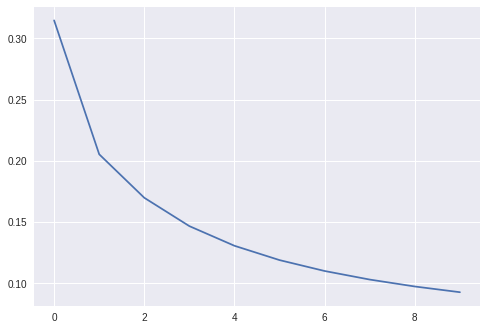

In [29]:
import matplotlib.pyplot as plt

# I want to show the cost of training over different iterations
plt.plot(d['costs'])
plt.show()

In [30]:
# the accuracy for number 0 to number 9

for i in range(10):
# if digit == i, then label = 1, else label = 0
    func = lambda x: 1 if x == i else 0
    y_train = np.array([func(y) for y in y_train_origin])
    y_test = np.array([func(y) for y in y_test_origin])
    
    y_train = y_train.reshape(1,y_train.shape[0])
    y_test = y_test.reshape(1,y_test.shape[0])
    
    print("\n", "the accuracy of number {}".format(i))
    
    d, train, test = model(x_train, y_train, x_test, y_test, num_iters=10, batch_size=10000, learning_rate=0.5, print_cost=False)
    


 the accuracy of number 0


 the accuracy of number 1


 the accuracy of number 2


 the accuracy of number 3


 the accuracy of number 4


 the accuracy of number 5


 the accuracy of number 6


 the accuracy of number 7


 the accuracy of number 8


 the accuracy of number 9



In [0]:
#Problem 3

In [0]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report

In [0]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()
num_class = 10

In [0]:
x_train = x_train_origin.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test_origin.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train_origin, num_class) 
y_test = to_categorical(y_test_origin, num_class) 

In [0]:
def init_params(dim):
    # w = feature * class
    # b = 1 * class
    w = np.zeros((dim, 10))
    b = np.zeros((1, 10))
    
    return w,b

In [0]:
def softmax(x):
    orig_shape = x.shape

    if len(x.shape) > 1:
        # Matrix
        exp_minmax = lambda x: np.exp(x - np.max(x))
        denom = lambda x: 1.0 / np.sum(x)
        x = np.apply_along_axis(exp_minmax,1,x)
        denominator = np.apply_along_axis(denom,1,x) 
        
        if len(denominator.shape) == 1:
            denominator = denominator.reshape((denominator.shape[0],1))
        
        x = x * denominator
    else:
        # Vector
        x_max = np.max(x)
        x = x - x_max
        numerator = np.exp(x)
        denominator =  1.0 / np.sum(numerator)
        x = numerator.dot(denominator)
        
    assert x.shape == orig_shape
    return x

In [0]:
def propagate(w, b, X, Y):
    
    m = X.shape[0]
    A = softmax((np.dot(X,w)) + b)
    cost  = -1/m * np.sum(Y*np.log(A))
    dw = -1/m * np.dot(X.T, (Y-A))
    db = -1/m * np.sum(Y-A)
    
    
    grads = {"dw":dw, "db": db}
    return grads, cost

In [0]:
def optimize(w, b, X, Y, num_iters, batch_size, learning_rate, print_cost):
    
    costs = []
    m = X.shape[0]
    for i in range(num_iters):
        #cost_batch is used to collect the cost during one iteration over different batches
        cost_batch = []
        #stochastic gradient descent
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices,:]
        y_shuffled = Y[shuffled_indices,:]
        #mini-batch
        for j in range(0, m, batch_size):
            x_batch = X_shuffled[j:j+batch_size,:]
            y_batch = y_shuffled[j:j+batch_size,:]
            grads, cost = propagate(w, b, x_batch, y_batch)
            dw = grads['dw']
            db = grads['db']
            
            w = w - learning_rate * dw
            b = b - learning_rate * db

            cost_batch.append(cost)
            # the cost of one iteration is the average number over batches
            cost = np.mean(cost_batch)
        costs.append(cost)
        
        if print_cost:
            print("Cost after iteration %i: %f" % (i+1, cost))

    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    
    return params, grads, costs

In [0]:
def predict(w, b, X):
    return softmax((np.dot(X, w) + b))

In [0]:
def accuracy(y_hat, Y):
    
    max_index = np.argmax(y_hat, axis=1)
    y_hat[np.arange(y_hat.shape[0]), max_index] = 1
    accuracy = np.sum(np.argmax(y_hat, axis=1)==np.argmax(Y, axis=1))   
    accuracy = accuracy *1.0/Y.shape[0]
    return accuracy

In [0]:
def model(x_train, y_train, x_test, y_test, num_iters=20, batch_size = 5, learning_rate=0.5, print_cost=False):
    
    w, b = init_params(x_train.shape[1])
    
    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iters, batch_size, learning_rate, print_cost)
    
    w = parameters['w']
    b = parameters['b']
    
    
    y_pred_test = predict(w, b, x_test)
    y_pred_train = predict(w, b, x_train)
    
    train_accuracy = accuracy(y_pred_train, y_train)
    test_accuracy = accuracy(y_pred_test, y_test)
    
    print("train accuracy: {} %".format(100*train_accuracy))
    print("test accuracy: {} %".format(100*test_accuracy))
    
    
    d = {
        'w':w,
        'b':b,
        'costs':costs,
        'Y_pred_test': y_pred_test, 
        'Y_pred_train' : y_pred_train, 
        'iterations':num_iters,
        'learning_rate':learning_rate,
        'num_iters': num_iters}
    return d, train_accuracy, test_accuracy

In [44]:
d, train, test = model(x_train, y_train, x_test, y_test, num_iters=10, batch_size=1000, learning_rate=0.01, print_cost=True)

Cost after iteration 1: 2.030160
Cost after iteration 2: 1.616034
Cost after iteration 3: 1.350082
Cost after iteration 4: 1.173625
Cost after iteration 5: 1.050658
Cost after iteration 6: 0.960807
Cost after iteration 7: 0.892452
Cost after iteration 8: 0.838632
Cost after iteration 9: 0.795165
Cost after iteration 10: 0.759239
train accuracy: 84.62333333333333 %
test accuracy: 85.63 %


In [0]:
#Problem 4

In [0]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()

In [0]:
x_train = x_train_origin.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test_origin.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train_origin, num_classes=10) 
y_test = to_categorical(y_test_origin, num_classes=10) 

In [49]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=784, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [51]:
history = model.fit(x_train, y_train, epochs=20, batch_size=1000, validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 2.1373 - acc: 0.2524 - val_loss: 1.8627 - val_acc: 0.5039
Epoch 2/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.6863 - acc: 0.5969 - val_loss: 1.5067 - val_acc: 0.6784
Epoch 3/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.4026 - acc: 0.7039 - val_loss: 1.2765 - val_acc: 0.7398
Epoch 4/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.2150 - acc: 0.7512 - val_loss: 1.1204 - val_acc: 0.7746
Epoch 5/20
60000/60000 [==============================] - 0s 8us/step - loss: 1.0844 - acc: 0.7776 - val_loss: 1.0091 - val_acc: 0.7962
Epoch 6/20
60000/60000 [==============================] - 0s 7us/step - loss: 0.9891 - acc: 0.7948 - val_loss: 0.9261 - val_acc: 0.8112
Epoch 7/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.9167 

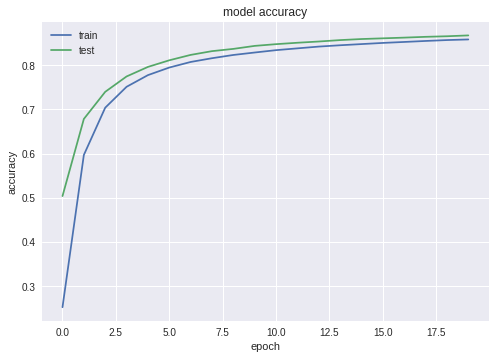

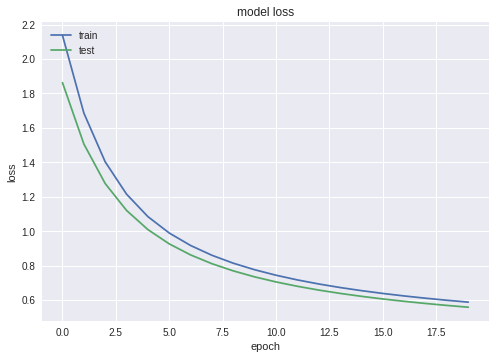

In [52]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Problem 5

In [0]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()
num_class = 10

In [0]:
x_train = ((x_train_origin/255)>0.5)*1
x_test = ((x_test_origin/255)>0.5)*1

In [0]:
y_train = to_categorical(y_train_origin, num_classes=10) 
y_test = to_categorical(y_test_origin, num_classes=10) 

In [0]:
def isSafe(X, i, j, visited): 
        # row number is in range, column number 
        # is in range and value is 0  
        # and not yet visited
        row = X.shape[0]
        col = X.shape[1]
        return (i >= 0 and i < row and 
                j >= 0 and j < col and 
                not visited[i][j] and X[i][j] == 0) 

In [0]:
def DFS(X, i, j, visited): 
  
        # These arrays are used to get row and  
        # column numbers of 8 neighbours  
        # of a given cell 
        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
          
        # Mark this cell as visited 
        visited[i][j] = True
  
        # Recur for all connected neighbours 
        for k in range(8): 
            if isSafe(X, i + rowNbr[k], j + colNbr[k], visited): 
                DFS(X, i + rowNbr[k], j + colNbr[k], visited)

In [0]:
def countwhite(X): 
    # Make a bool array to mark visited cells. 
    # Initially all cells are unvisited
    row = X.shape[0]
    col = X.shape[1]    
    visited = [[False for j in range(col)]for i in range(row)] 

    # Initialize count as 0 and travese  
    # through the all cells of 
    # given matrix 
    count = 0
    for i in range(row): 
        for j in range(col): 
            # If a cell with value 1 is not visited yet,  
            # then new island found 
            if visited[i][j] == False and X[i][j] == 0: 
                # Visit all cells in this island  
                # and increment island count 
                DFS(X, i, j, visited) 
                count += 1

    return count

In [0]:
# training dataset with extra feature 
white_area = np.zeros((x_train.shape[0],1))

for i in range (x_train.shape[0]):
    x = x_train[i]
    white_area[i, 0] = countwhite(x)

In [0]:
x_train = x_train_origin.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_train = np.append(x_train, white_area/3, axis = 1)

In [0]:
# test dataset with extra feature 
white_area = np.zeros((x_test.shape[0],1))

for i in range (x_test.shape[0]):
    x = x_test[i]
    white_area[i, 0] = countwhite(x)

In [0]:
x_test = x_test_origin.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

x_test = np.append(x_test, white_area/3, axis = 1)

In [66]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=785, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 2.1341 - acc: 0.2576 - val_loss: 1.8598 - val_acc: 0.5092
Epoch 2/20
60000/60000 [==============================] - 1s 10us/step - loss: 1.6832 - acc: 0.6009 - val_loss: 1.5034 - val_acc: 0.6808
Epoch 3/20
60000/60000 [==============================] - 1s 10us/step - loss: 1.3991 - acc: 0.7069 - val_loss: 1.2729 - val_acc: 0.7443
Epoch 4/20
60000/60000 [==============================] - 1s 10us/step - loss: 1.2112 - acc: 0.7534 - val_loss: 1.1166 - val_acc: 0.7775
Epoch 5/20
60000/60000 [==============================] - 1s 10us/step - loss: 1.0804 - acc: 0.7794 - val_loss: 1.0051 - val_acc: 0.7985
Epoch 6/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.9850 - acc: 0.7968 - val_loss: 0.9220 - val_acc: 0.8141
Epoch 7/20
60000/60000 [==============================] - 1s 10us/step - loss: 0.9125 - acc: 0.8093 - val_loss: 0.8577 - val_acc

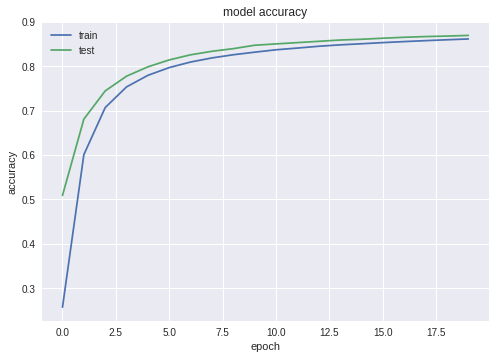

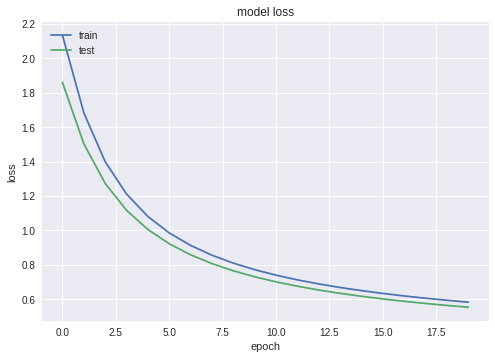

In [67]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()